# Overview



Perusahaan PT. ABC adalah sebuah perusahaan retail yang ingin meningkatkan strategi pemasaran mereka dengan cara memahami segmen pelanggan yang ada. Untuk itu, perusahaan PT. ABC membutuhkan analisis segmentasi pelanggan berdasarkan perilaku pembelian mereka. Dengan menggunakan dataset yang berisi informasi seperti ID pelanggan, umur, penghasilan tahunan, dan skor belanja, lakukan analisis clustering menggunakan algoritma algoritma clustering untuk mengelompokkan pelanggan ke dalam segmen-segmen yang berbeda.

# Mengumpulkan Data & Mengeksplorasi Data

Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Load Data

In [ ]:
df = pd.read_csv('customer_segmentation.csv')

Membaca Data

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Membersihkan Data

Missing Values

In [ ]:
# Mengecek Missing Values

missing_data = df.isnull().sum()
print(missing_data)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Imputasi Missing Values Menggunakan metode K-Nearest Neighbors (KNN)

imputer = KNNImputer(n_neighbors=5)
df[['Income']] = imputer.fit_transform(df[['Income']])

In [ ]:
# Mengecek Kembali Missing Values Setelah Dilakukan Imputasi

missing_data = df.isnull().sum()
print(missing_data)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Duplicated Data

In [ ]:
df.duplicated().sum()

0

Simplifikasi Kategori

In [ ]:
# Mengambil Data Kategorikal dalam Dataframe

category = [col for col in df if df[col].dtypes=='object']
category_df = df[category]
category_df.head()

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


In [ ]:
# Mengecek Unique Values dari Masing-Masing Kolom Kategorikal

for col in category_df.columns:
    print(f"{col} : {len(category_df[col].unique())} unique values \n")

Education : 5 unique values 

Marital_Status : 8 unique values 

Dt_Customer : 663 unique values 



Dari ketiga kolom kategorikal, dipilih kolom "Education" dan "Marital_Status" untuk disimplifikasi. Sedangkan "Dt_Customer" tidak akan digunakan pada clustering nantinya.

In [ ]:
# Mengecek Total Kategori Sebelum Simplifikasi

print("Kategori Sebelum Dilakukan Simplifikasi\n")
print("Total kategori dalam kolom Marital Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total kategori dalam kolom Education:\n", df["Education"].value_counts())

Kategori Sebelum Dilakukan Simplifikasi

Total kategori dalam kolom Marital Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total kategori dalam kolom Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [ ]:
# Melakukan Simplfikasi dengan Mempersempit Kategori

df['Marital_Status'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner",
                                                     "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate",
                                           "Graduation":"Graduate",
                                           "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Alone,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Alone,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Partner,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Partner,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Partner,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Mengecek Total Kategori Setelah Simplifikasi

print("Kategori Setelah Dilakukan Simplifikasi\n")
print("Total kategori dalam kolom Marital Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total kategori dalam kolom Education:\n", df["Education"].value_counts())

Kategori Setelah Dilakukan Simplifikasi

Total kategori dalam kolom Marital Status:
 Marital_Status
Partner    1444
Alone       796
Name: count, dtype: int64 

Total kategori dalam kolom Education:
 Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64


Membuat Kolom Baru untuk Simplifikasi

In [ ]:
# Menggabungkan Kolom "Kidhome" dan "Teenhome" menjadi Kolom "Children"

df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# Membuat Kolom "Age"

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

Menyeleksi Kolom yang Tidak Digunakan

In [ ]:
df = df.drop(columns = ['Dt_Customer', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Z_CostContact', 'Z_Revenue'], axis = 1)

In [ ]:
print(df.head())

      Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0      Graduate          Alone  58138.0       58       635         88   
1      Graduate          Alone  46344.0       38        11          1   
2      Graduate        Partner  71613.0       26       426         49   
3      Graduate        Partner  26646.0       26        11          4   
4  Postgraduate        Partner  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7    

Melakukan Label Encoder

In [ ]:
# Mengecek Data Kategorikal

a = (df.dtypes == 'object')
object_cols = list(a[a].index)
print("Data Kategorikal :", object_cols)

Data Kategorikal : ['Education', 'Marital_Status']


In [ ]:
# Melakukan Label Encoder

LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

In [ ]:
print(df.head())

   Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0          0               0  58138.0       58       635         88   
1          0               0  46344.0       38        11          1   
2          0               1  71613.0       26       426         49   
3          0               1  26646.0       26        11          4   
4          1               1  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0  

Outlier

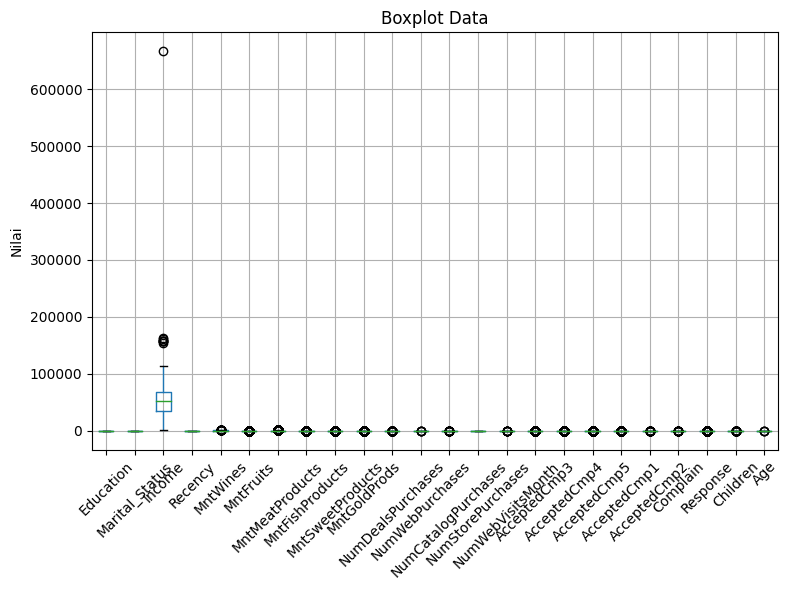

Data Outlier:
Education                0
Marital_Status           0
Income                   8
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
AcceptedCmp1           144
AcceptedCmp2            30
Complain                21
Response               334
Children                53
Age                      3
dtype: int64


In [ ]:
# Mengecek Outlier Keseluruhan

warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 6))
df.boxplot()
plt.title('Boxplot Data')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print('Data Outlier:')
print(outliers)

Dari outlier yang ditemukan, yang mungkin untuk ditangani adalah untuk kolom "Income" dan "Age".

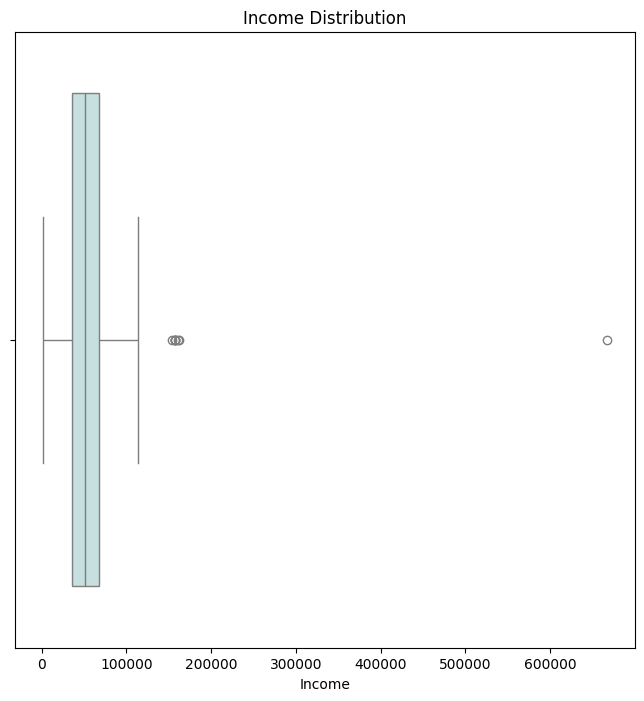

In [ ]:
# Mengecek Outlier Kolom "Income"

plt.figure(figsize=[8,8])
sns.boxplot(data=df, x='Income', palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

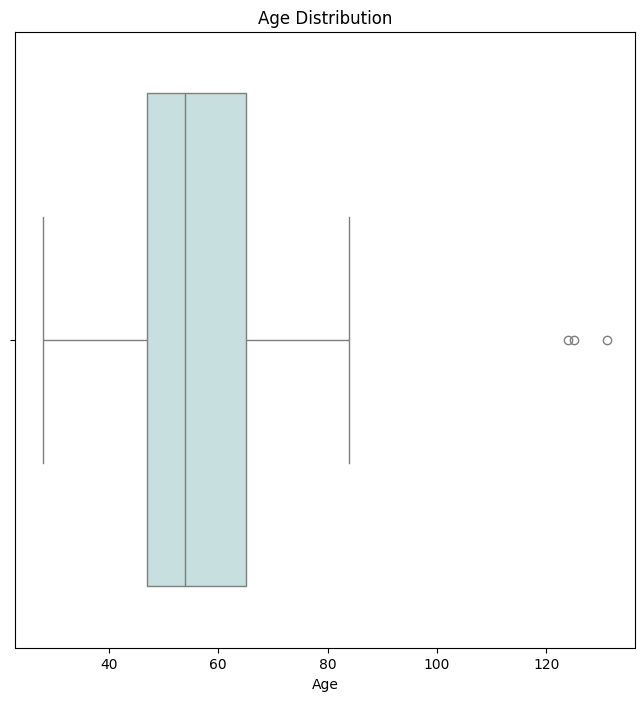

In [ ]:
# Mengecek Outlier Kolom "Age"

plt.figure(figsize=[8,8])
sns.boxplot(data=df, x='Age', palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [ ]:
# Menghilangkan Outlier

df = df[(df["Age"]<90)]
df = df[(df["Income"]<120000)]
print("Jumlah total data-points setelah menghapus outlier :", len(df))

Jumlah total data-points setelah menghapus outlier : 2229


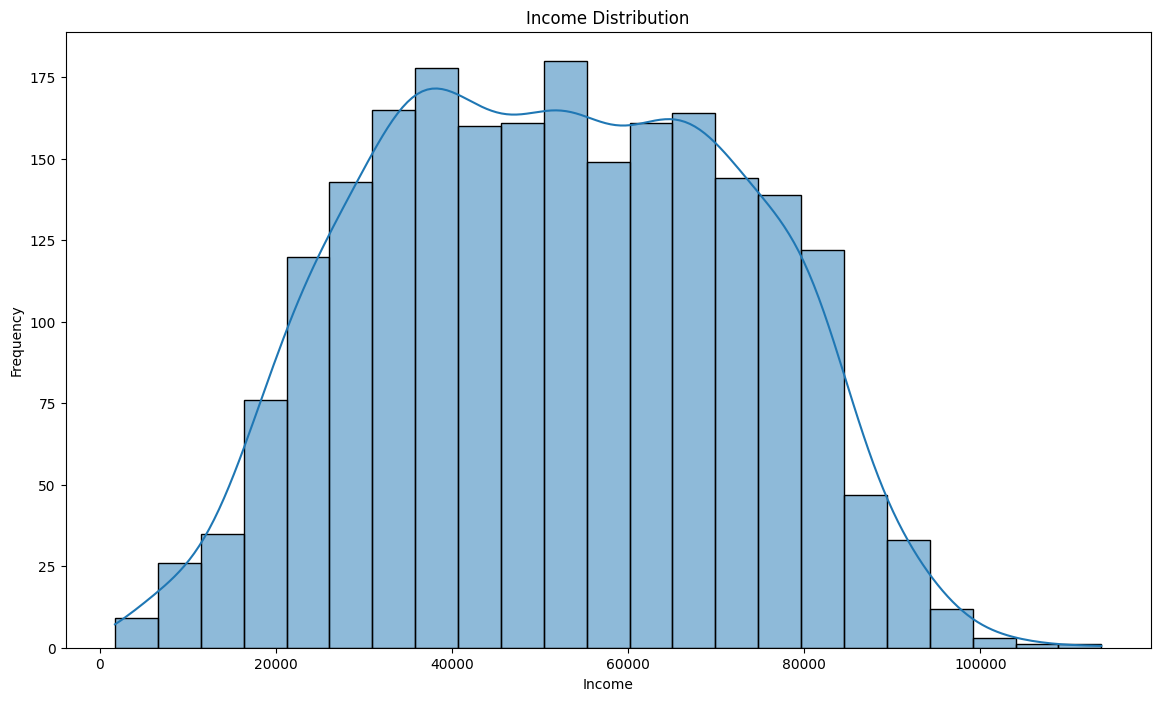

In [ ]:
# Pengecekan Kembali Kolom "Income" Setelah Dihilangkan Outlier-nya

plt.figure(figsize=[14,8])
sns.histplot(data=df, x='Income', kde=True,palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

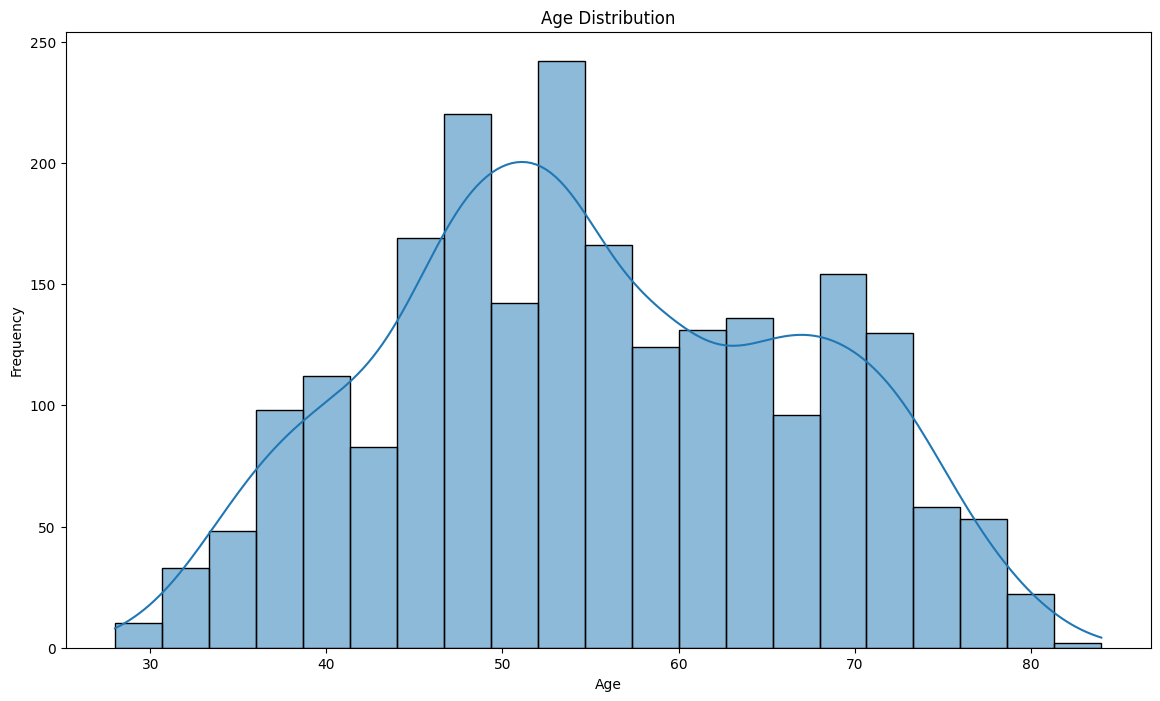

In [ ]:
# Pengecekan Kembali Kolom "Age" Setelah Dihilangkan Outlier-nya

plt.figure(figsize=[14,8])
sns.histplot(data=df, x='Age', kde=True,palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Membuat Pemodelan Data

Normalisasi Data

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Melakukan Clustering dengan K-Means dimana k=3

In [ ]:
kmeans = KMeans (n_clusters=3, n_init=10)
kmeans.fit(df_scaled)
label=kmeans.labels_
centroid = kmeans.cluster_centers_
label

array([1, 0, 2, ..., 2, 2, 0], dtype=int32)

# Mengevaluasi Model

Melakukan Evaluasi dengan CHI


In [ ]:
ch_indices = []
wcss = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(df_scaled)
  label=kmeans.labels_
  CHIndex=metrics.calinski_harabasz_score(df_scaled, label)
  ch_indices.append((i, CHIndex))
  wcss.append(kmeans.inertia_)
  print(f"CH Index untuk k={i}:{CHIndex}")

CH Index untuk k=2:624.3542760813857
CH Index untuk k=3:431.4783248565647
CH Index untuk k=4:361.27597860755765
CH Index untuk k=5:320.23040994033875
CH Index untuk k=6:277.7805408053128
CH Index untuk k=7:264.14102477583543
CH Index untuk k=8:250.45237618203024
CH Index untuk k=9:241.97721593671514
CH Index untuk k=10:232.2784730130569


Mencari K Optimal dengan Nilai Optimum CHI

In [ ]:
optimal_k_ch, optimal_ch_index = max(ch_indices, key=lambda x: x[1])
print(f"Optimal k berdasarkan CH Index adalah {optimal_k_ch} dengan CH Index {optimal_ch_index}")

Optimal k berdasarkan CH Index adalah 2 dengan CH Index 624.3542760813857


Melakukan Metode Elbow

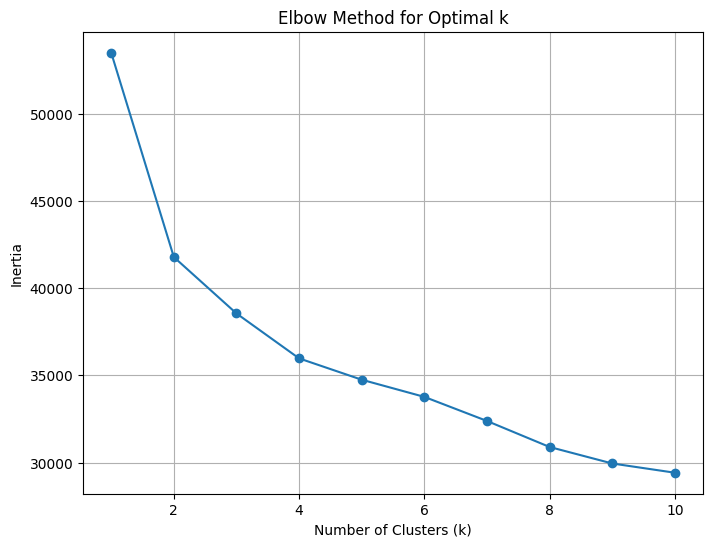

In [ ]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Kesimpulan

 Jumlah cluster optimal untuk data PT. ABC adalah k=2 berdasarkan analisis Indeks Calinski-Harabasz (CH) dan Metode Elbow. Data dinormalisasi terlebih dahulu untuk memastikan skala yang konsisten sebelum menerapkan algoritma K-Means. Meskipun K-Means clustering awal dilakukan dengan k = 3 dan divisualisasikan, analisis lebih lanjut dengan berbagai nilai k (2 hingga 10) dilakukan untuk mengevaluasi kualitas klasterisasi. Indeks CH dihitung untuk setiap nilai k, memberikan ukuran kuantitatif terhadap kualitas klasterisasi, di mana nilai tertinggi menunjukkan hasil terbaik. Selain itu, plot Metode Elbow yang memetakan Within-cluster Sum of Squares (WCSS) terhadap jumlah cluster digunakan untuk mengidentifikasi titik "elbow" di mana penambahan cluster tidak lagi secara signifikan mengurangi WCSS. Dari grafik Metode Elbow, dapat disimpulkan bahwa nilai k = 2 dikarenakan adanya lengkungan yang cukup tajam pada titik tersebut. Berdasarkan hasil dari kedua metode ini, nilai k = 2 memberikan keseimbangan terbaik antara jumlah cluster dan kualitas klasterisasi, itunjukkan oleh nilai Indeks CH yang tinggi dan titik elbow yang jelas. Oleh karena itu, **jumlah cluster optimal ditentukan sebagai k = 2**, yang mengindikasikan bahwa pembagian data ke dalam dua cluster memberikan hasil yang paling efektif.